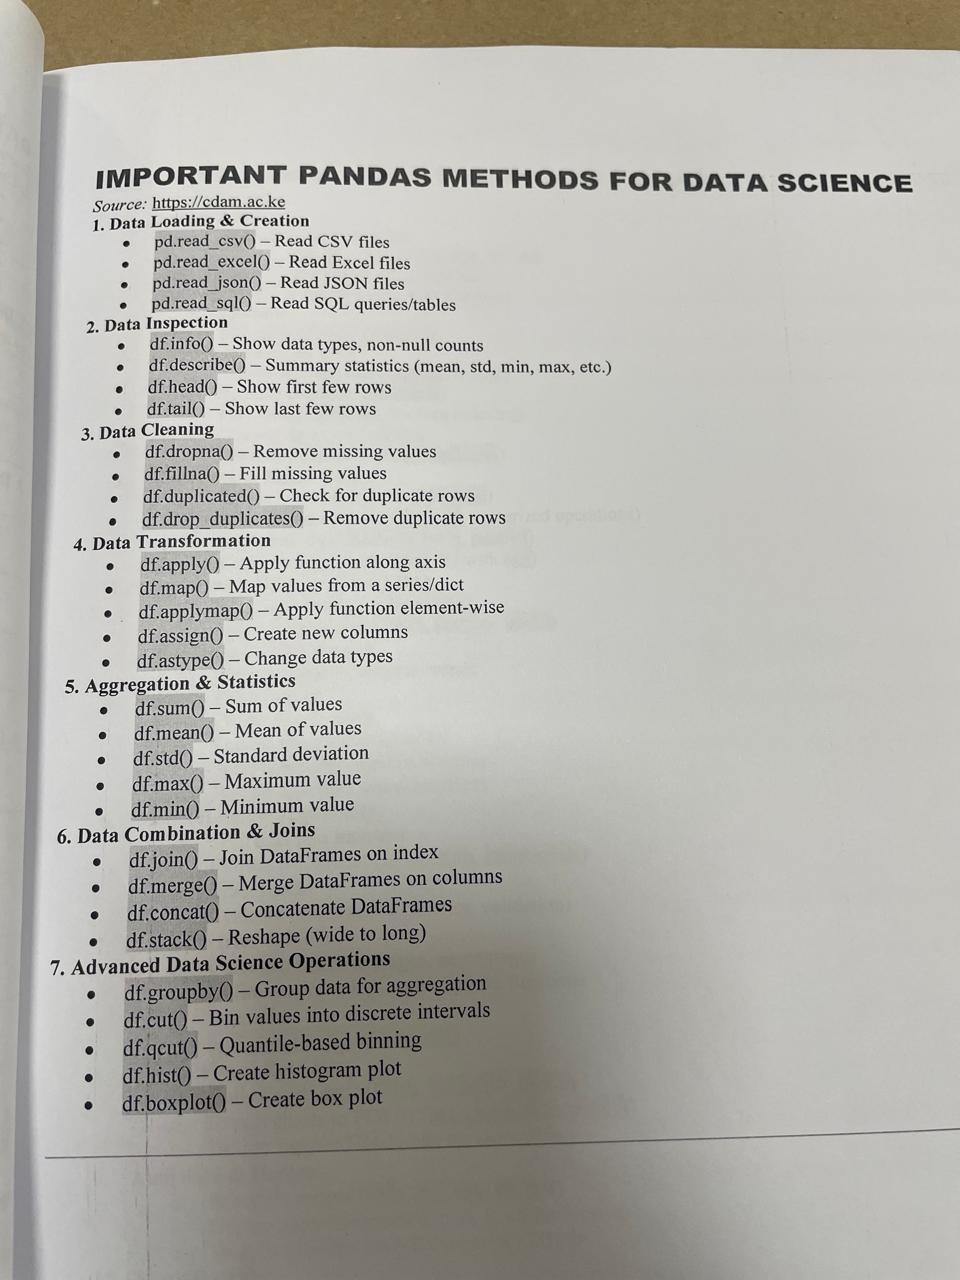

In [32]:
# Open the Pandas cheat code image file image file
img = Image.open('Pandas_cheatcode.jpeg')
img

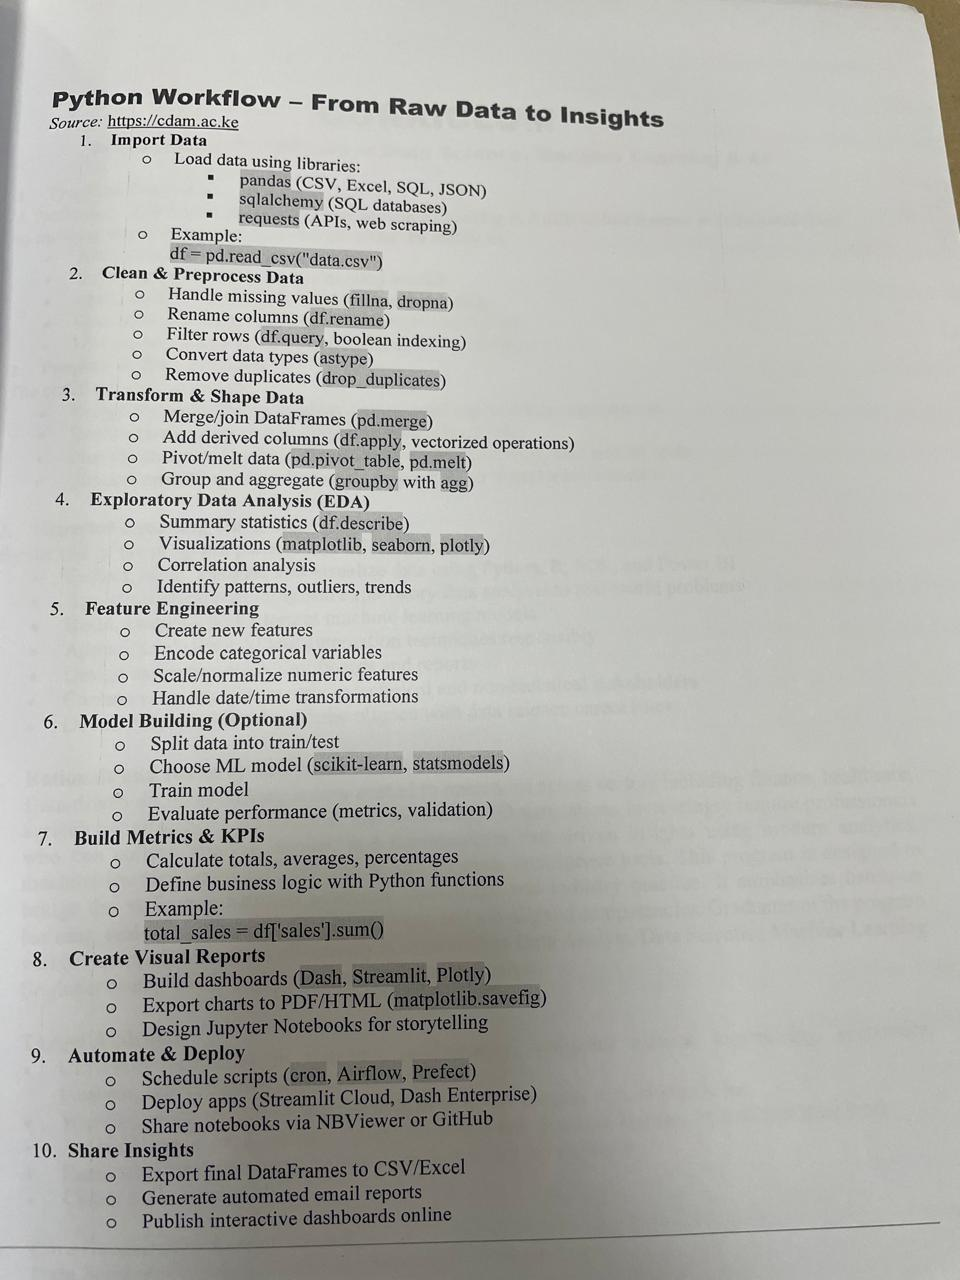

In [30]:
from PIL import Image

# Open the Python workflow image file image file
img = Image.open('Python_workflow.jpeg')
img

### Analysis of the Ames Housing dataset to understand What Drives House Prices? The data has important variables such as SalePrice (target), GrLivArea, OverallQual, GarageArea, TotalBsmtSFand YearBuilt that are know to affect house pricing

In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_openml

# Part 1: Data Loading and Understanding

In [2]:
# loading the dataset
df=pd.read_csv("AmesHousing.csv")
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
#  Data inspection
# Dataset shape
print("Shape of dataset:", df.shape)

# Column names
print(df.columns)

# Data types
print(df.dtypes)

# Summary statistics (numerical)
df.describe()


Shape of dataset: (2930, 82)
Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage T

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


# Part 2: Data Cleaning 

### checking for missing values

In [4]:
# Count missing values
df.isnull().sum().sort_values(ascending=False).head(10)
       #checking for missing values in the first rows

Pool QC          2917
Misc Feature     2824
Alley            2732
Fence            2358
Mas Vnr Type     1775
Fireplace Qu     1422
Lot Frontage      490
Garage Cond       159
Garage Finish     159
Garage Yr Blt     159
dtype: int64

From the data the missing values are sorted and arranged in order from the largest to the smallest. The next step would be to handle the missing data before the data analysis process. Take note it is usually important to handle missing values for most important columns especially the ones that you require during your analysis as opposed to handling the entire dataset. Nevertheless handling all missing values in the entire dataset is also welcome.

### Keeping important variables only

In [7]:
# Select relevant columns
df = df[['SalePrice', 'Gr Liv Area', 'Overall Qual',
         'Garage Area', 'Total Bsmt SF', 'Year Built']]
df.head()

,SalePrice,Gr Liv Area,Overall Qual,Garage Area,Total Bsmt SF,Year Built
0,215000,1656,6,528.0,1080.0,1960
1,105000,896,5,730.0,882.0,1961
2,172000,1329,6,312.0,1329.0,1958
3,244000,2110,7,522.0,2110.0,1968
4,189900,1629,5,482.0,928.0,1997


#### Checking for missing values again from the select important variables



In [8]:
df.isnull().sum()

SalePrice        0
Gr Liv Area      0
Overall Qual     0
Garage Area      1
Total Bsmt SF    1
Year Built       0
dtype: int64

#### drop missing values

In [9]:
df = df.dropna()

#### checking for duplicates


In [10]:
df.duplicated().sum()

np.int64(8)

# Part 3: Exploratory Data Analysis (EDA)

#### histogram of saleprice

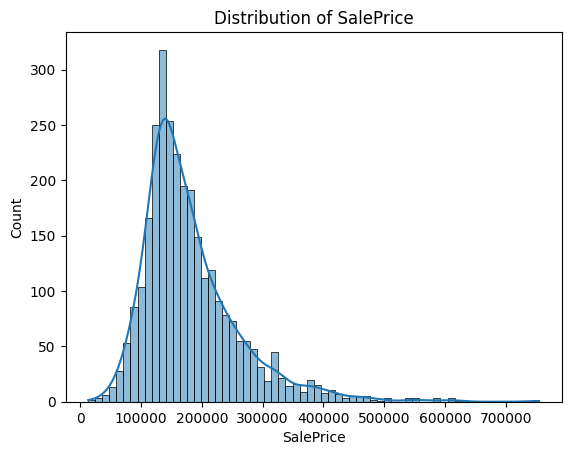

In [12]:
sns.histplot(df['SalePrice'], kde=True)
plt.title("Distribution of SalePrice")
plt.show()


#### Boxplot

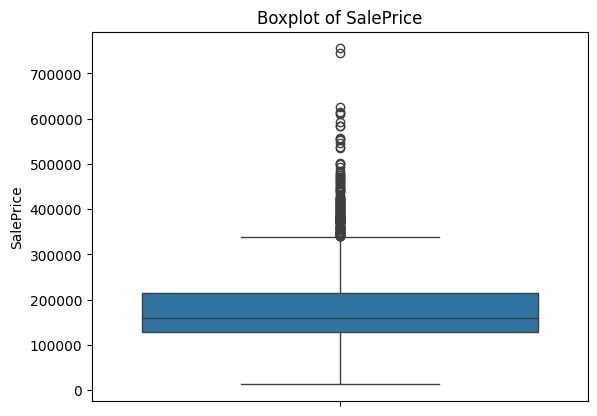

In [13]:

sns.boxplot(y=df['SalePrice'])
plt.title("Boxplot of SalePrice")
plt.show()


#### Scatterplot: Gr Liv Area vs SalePrice

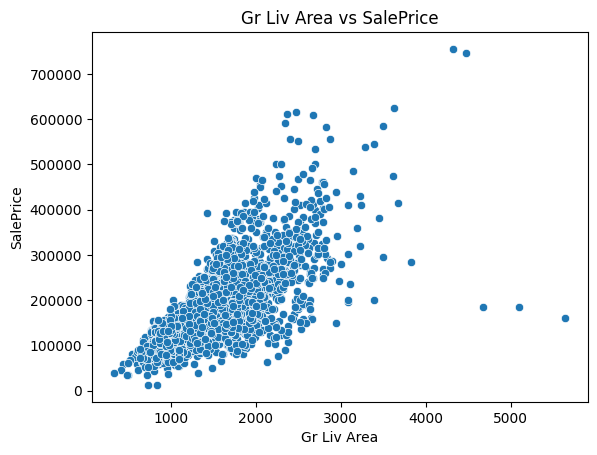

In [15]:

sns.scatterplot(x='Gr Liv Area', y='SalePrice', data=df)
plt.title("Gr Liv Area vs SalePrice")
plt.show()


#### Scatterplot: GarageArea vs SalePrice

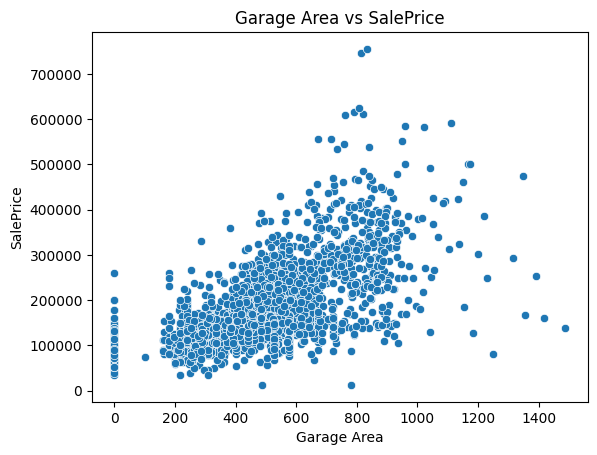

In [17]:
plt.figure()
sns.scatterplot(x='Garage Area', y='SalePrice', data=df)
plt.title("Garage Area vs SalePrice")
plt.show()


#### Barplot: OverallQual vs Average SalePrice

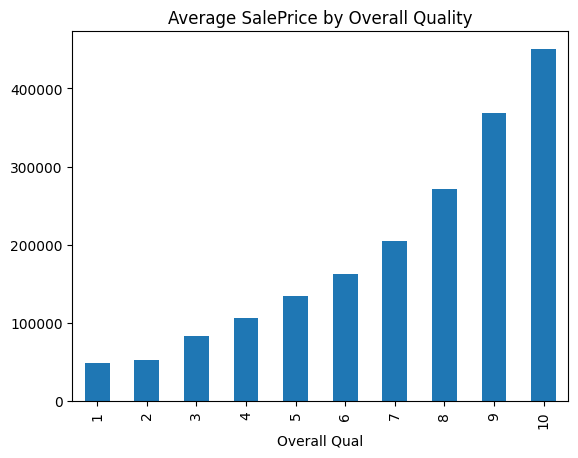

In [18]:
plt.figure()
df.groupby('Overall Qual')['SalePrice'].mean().plot(kind='bar')
plt.title("Average SalePrice by Overall Quality")
plt.show()


#### Correlation heatmap

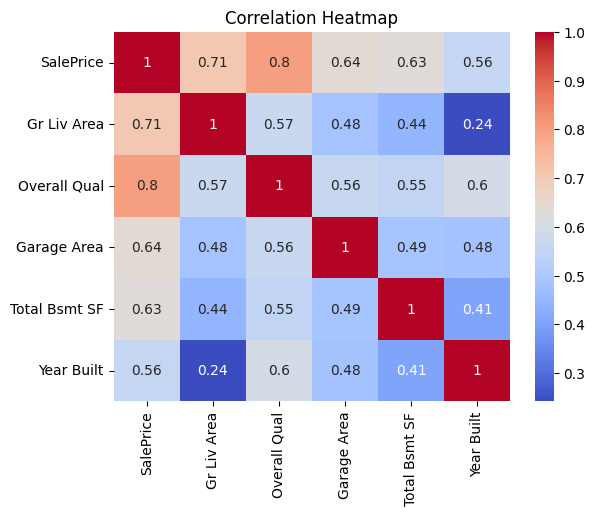

In [19]:
plt.figure()
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


# Part 4: Correlation Analysis

In [20]:
# Correlation with SalePrice
corr_matrix = df.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)


SalePrice        1.000000
Overall Qual     0.799140
Gr Liv Area      0.706779
Garage Area      0.640276
Total Bsmt SF    0.632260
Year Built       0.558336
Name: SalePrice, dtype: float64

Interpretation

OverallQual and GrLivArea show strong positive correlation.

GarageArea and TotalBsmtSF show moderate correlation.

YearBuilt shows weaker positive correlation.

# Part 5: Simple Linear Regression

In [22]:
# Define variables
X = df['Gr Liv Area']
y = df['SalePrice']

# Add constant
X = sm.add_constant(X)

# Fit model
model1 = sm.OLS(y, X).fit()

# Summary
print(model1.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.499
Method:                 Least Squares   F-statistic:                     2921.
Date:                Wed, 18 Feb 2026   Prob (F-statistic):               0.00
Time:                        21:48:21   Log-Likelihood:                -36193.
No. Observations:                2928   AIC:                         7.239e+04
Df Residuals:                    2926   BIC:                         7.240e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1.332e+04   3271.063      4.073      

Interpretation
Coefficient is positive → larger living area increases price.

p-value < 0.05 → statistically significant.

R-squared shows percentage of variation explained.

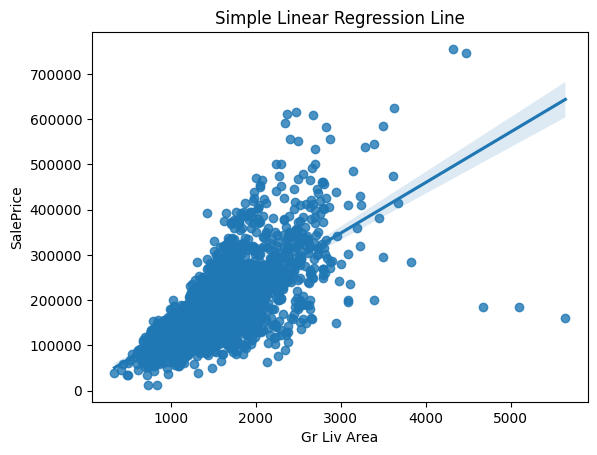

In [24]:
### Plot the regression line
plt.figure()
sns.regplot(x='Gr Liv Area', y='SalePrice', data=df)
plt.title("Simple Linear Regression Line")
plt.show()


# PART 6: Multiple Linear Regression

In [25]:
X = df[['Gr Liv Area', 'Overall Qual',
        'Garage Area', 'Total Bsmt SF', 'Year Built']]

y = df['SalePrice']

# Add constant
X = sm.add_constant(X)

# Fit model
model2 = sm.OLS(y, X).fit()

print(model2.summary())


                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     2175.
Date:                Wed, 18 Feb 2026   Prob (F-statistic):               0.00
Time:                        21:50:39   Log-Likelihood:                -34934.
No. Observations:                2928   AIC:                         6.988e+04
Df Residuals:                    2922   BIC:                         6.992e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -7.36e+05   5.62e+04    -13.105

Interpretation
R-squared is higher than simple regression.

Overall Qual usually has the strongest coefficient.

Most predictors are statistically significant.

Multiple regression improves prediction accuracy.